## Importar librerías

In [1]:
# !pip install imblearn

In [13]:
import pandas as pd
import numpy as np

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix, ConfusionMatrixDisplay


## Importar Dataset prerpocesado

In [14]:
df = pd.read_csv('features_extraidas.csv')
df = df.drop(df.columns[0], axis=1)

df = df.drop('Eta_e_r', axis=1)
df = df.drop('Eta_e_g', axis=1)
df = df.drop('MaxSlope_r', axis=1)
df = df.drop('MaxSlope_g', axis=1)
df = df.drop('Period_band_g', axis=1)
df = df.drop('delta_period_g', axis=1)


df = df.fillna(-999)
# df = df.fillna(df.mean())

#Eliminamos filas con valores faltantes
# df = df.dropna(axis=0)

df = df.drop_duplicates()

# print(f'Tamaño del dataset:\t{df.shape}')
# df

In [15]:
df

,index,oid,delta_mag_fid_g,delta_mjd_fid_g,first_mag_g,mean_mag_g,min_mag_g,n_det_g,n_neg_g,n_pos_g,...,SmallKurtosis_r,Std_r,StetsonK_r,Pvar_r,ExcessVar_r,SF_ML_amplitude_r,SF_ML_gamma_r,IAR_phi_r,LinearTrend_r,classALeRCE
0,0,ZTF17aadlxmv,0.489893,42.055613,17.454949,17.295473,16.994532,18.0,0.0,18.0,...,13.137293,0.265521,0.510386,1.000000e+00,-33.720276,-0.500000,-0.500000,0.874036,0.005381,SNIa
54,1,ZTF18aaaqexr,0.121316,18.870671,16.733905,16.711534,16.633707,9.0,0.0,9.0,...,-999.000000,-999.000000,-999.000000,-9.990000e+02,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,SNIa
65,2,ZTF18aacdbzx,0.123097,19.991725,18.178415,18.159091,18.096627,14.0,0.0,14.0,...,1.498546,0.046752,0.711686,1.485481e-60,-32.610615,-0.500000,-0.500000,0.999547,0.003567,SNIbc
99,3,ZTF18aadmssd,1.015765,59.951100,16.399704,17.049047,16.399704,16.0,0.0,16.0,...,-0.593508,0.190405,0.827050,4.356760e-74,-38.680328,-0.500000,-0.500000,0.999999,0.007788,SNII
145,4,ZTF18aadzfso,0.364548,32.999224,17.839005,17.710422,17.475610,24.0,0.0,24.0,...,-0.559022,0.042706,0.856073,6.496568e-93,-34.907166,-0.500000,-0.500000,0.999267,0.001497,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128356,2063,ZTF20abgbxfm,2.981503,68.950197,18.893476,19.555296,18.296597,58.0,0.0,58.0,...,-1.248496,0.640637,0.835498,1.000000e+00,0.001038,10.708651,0.977811,0.991739,0.032839,SNIa
128490,2064,ZTF20abgdtmv,2.669654,33.020729,18.728144,20.046770,18.663546,26.0,0.0,26.0,...,-0.974009,0.528035,0.858666,1.000000e+00,0.000697,7.053065,0.740276,0.979279,0.039661,SNIa
128556,2065,ZTF20abgfekk,1.314085,31.928044,18.671485,17.593371,17.357400,32.0,0.0,32.0,...,5.608756,0.266109,0.684980,1.000000e+00,0.000222,11.677370,1.048642,0.953808,-0.019504,SNIa
128628,2066,ZTF20abgfljj,1.344170,21.932766,19.791739,19.019873,18.447569,26.0,0.0,26.0,...,0.948814,0.661672,0.819832,1.000000e+00,0.001141,4.158228,0.454654,0.909056,-0.031579,SNIa


## Clasificación: Random Forest

In [16]:
X = df.copy()
X = X.drop('oid', axis=1)
X = X.drop('classALeRCE', axis=1)
y = df['classALeRCE']
test_size = 0.2

random_state = 15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify = y)

In [17]:
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X_train, y_train)

In [18]:
clf = BalancedRandomForestClassifier(sampling_strategy="all", max_depth = 8, replacement=True, random_state=0)

# clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(X_train, y_train)

BalancedRandomForestClassifier(max_depth=8, random_state=0, replacement=True,
                               sampling_strategy='all')

In [19]:
y_pred = clf.predict(X_test)
y_pred[:5]

array(['SNIbc', 'SNII', 'SNIa', 'SNIa', 'SNIbc'], dtype=object)

**Accuracy**

In [20]:
accuracy_score(y_test, y_pred)

0.538647342995169

**Reporte de metricas**

In [21]:
print(classification_report(y_test, y_pred, target_names = clf.classes_))

              precision    recall  f1-score   support

        SLSN       0.17      0.71      0.27         7
        SNII       0.62      0.53      0.57        78
        SNIa       0.88      0.55      0.68       308
       SNIbc       0.06      0.38      0.11        21

    accuracy                           0.54       414
   macro avg       0.43      0.54      0.41       414
weighted avg       0.78      0.54      0.62       414



**Matriz de confusion**

In [22]:
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

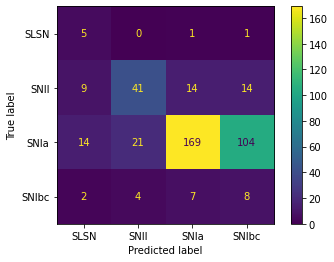

In [23]:
disp.plot()